In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/ML_Results/preprocessed.csv")

X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values


X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.7, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 7,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, epochs = 50, validation_data=(X_valid, y_valid))

y_pred = ann.predict(sc.transform(X_test))
y_pred = (y_pred > 0.5)

loss,acc = ann.evaluate(sc.transform(X_test),y_test)

print("Loss: ", loss)
print("Accuracy: ", acc)

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 0.2169 - accuracy: 0.6466 - val_loss: 0.1947 - val_accuracy: 0.7458
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.7849 - val_loss: 0.1681 - val_accuracy: 0.8629
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.8645 - val_loss: 0.1470 - val_accuracy: 0.8763
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.8760 - val_loss: 0.1292 - val_accuracy: 0.9030
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.8910 - val_loss: 0.1136 - val_accuracy: 0.9231
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9032 - val_loss: 0.0998 - val_accuracy: 0.9365
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9176 - val_loss: 0.0882 - val_accuracy: 0.9431
Epoch 8/50
44/44 [==

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [5]:
print("Classification report for classifier %s:\n%s\n" % (
    ann, classification_report(y_test, y_pred)))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f3c5ba9fb50>:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       247
           1       0.98      0.96      0.97        53

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300




In [6]:
################# Confusion matrix
y_pred = ann.predict(sc.transform(X_test))
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[246   1]
 [  2  51]]

Model accuracy:  0.99


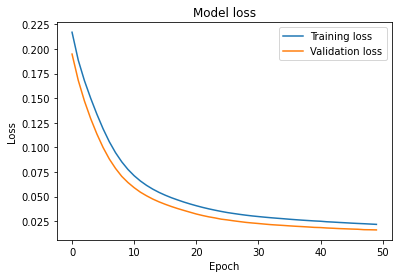

In [7]:
################### Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

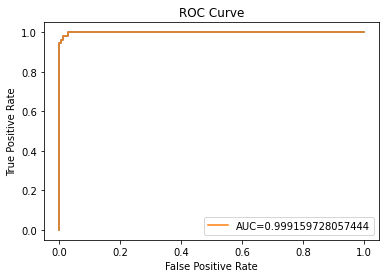

In [8]:
################## ROC Curve
y_pred = ann.predict(sc.transform(X_test)).ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [9]:
import pickle
fileName = "/content/drive/MyDrive/ML_Results_Main/ANN_Numeric_99.model"
pickle.dump(ann, open(fileName, 'wb'))

INFO:tensorflow:Assets written to: ram://a0fdeba1-3b25-48ea-9726-ca88be49237b/assets
